<a href="https://colab.research.google.com/github/N-Vasu-Reddy/Machine-Learning-Mini-Porjects/blob/main/Medical_Insurance_Cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data collection and Analysis

In [ ]:
# loading the data frame from csv file to a pandas dataframe
insurance_dataset = pd.read_csv('/content/drive/MyDrive/New folder/insurance.csv', encoding ='latin1')

In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Finding no of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
#Information of the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Checking the missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
#Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-19-ffbf0e716397>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


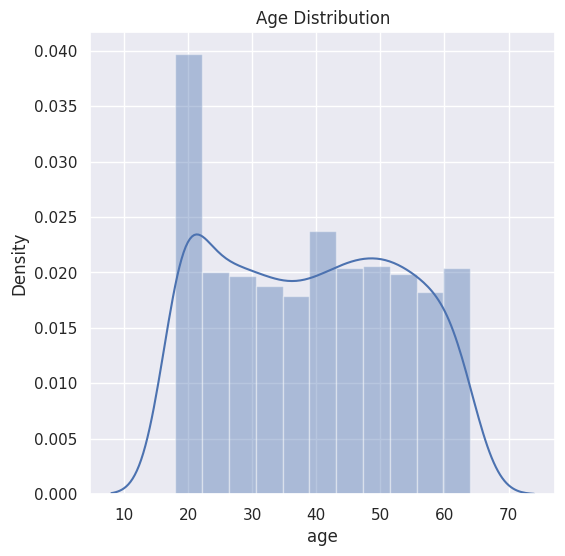

In [ ]:
#Distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

<Axes: xlabel='sex', ylabel='count'>

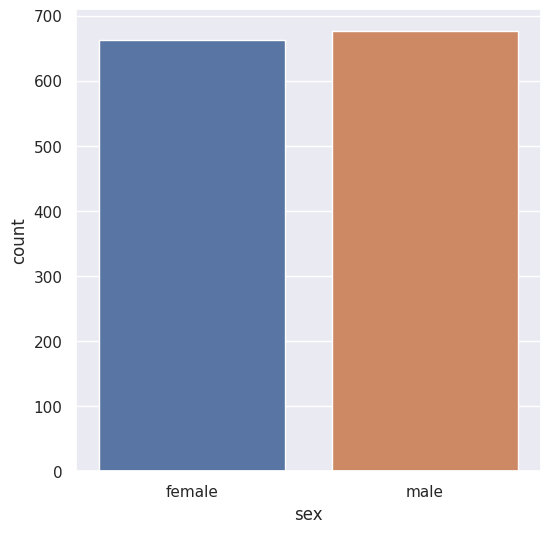

In [ ]:
#gender column
plt.figure(figsize =(6,6))
sns.countplot( x = 'sex', data =insurance_dataset)

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-22-f46c3cb4cd25>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


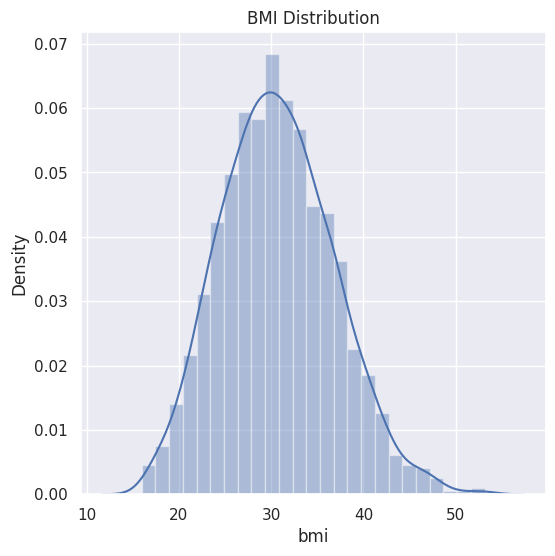

In [ ]:
#BMI distribution
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range is18.5 to 24.9

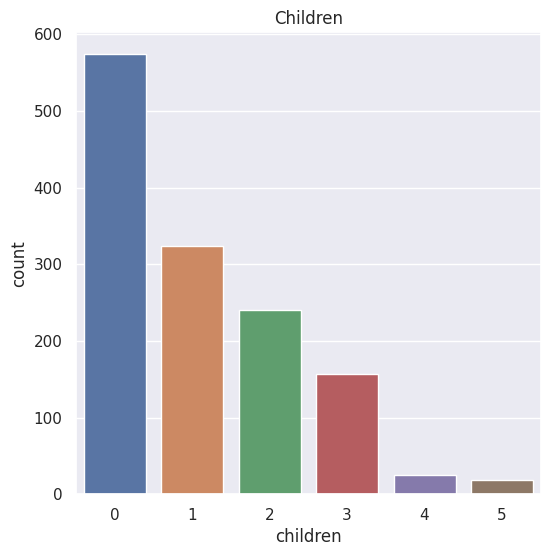

In [ ]:
#Children distribution
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x = 'children',data =insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

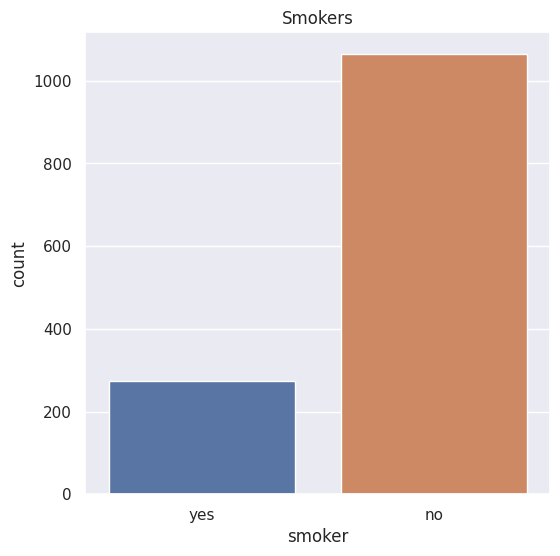

In [ ]:
#smoker distribution
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker',data =insurance_dataset)
plt.title('Smokers')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

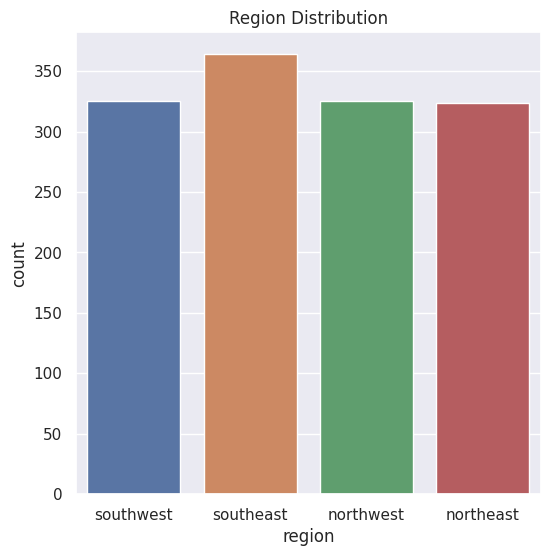

In [ ]:
#Region distribution
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x = 'region',data =insurance_dataset)
plt.title('Region Distribution')
plt.show()

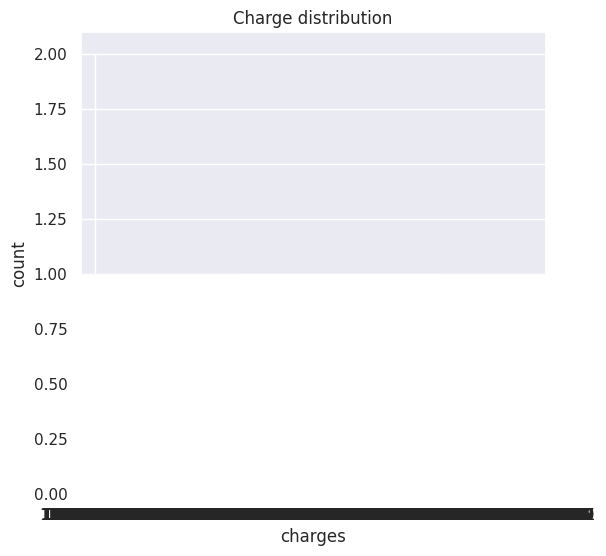

In [ ]:
#Charge distribution
sns.set()
plt.figure(figsize = (6,6))
sns.countplot(x = 'charges',data =insurance_dataset)
plt.title('Charge distribution')
plt.show()

**Data Preprocessing**

Encoding the categorical features



In [ ]:
#encoding the sex column
insurance_dataset.replace({'sex': { 'male': 0 , 'female': 1}},inplace= True)

#encoding Smoker column
insurance_dataset.replace({'smoker': { 'yes': 0 , 'no': 1}},inplace = True)
#encoding Region column
insurance_dataset.replace({'region': { 'southeast': 0 , 'southwest': 1, 'northeast': 2,'northwest':3}},inplace = True)

Splitting features and Target

In [ ]:
x = insurance_dataset.drop( columns ='charges' , axis = 1)

In [ ]:
y = insurance_dataset['charges']

Splitting the data into training and testing data

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [ ]:
#Calling linear Regression model
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
#Prediction on training data
training_data_prediction = model.predict(x_train)

In [ ]:
#r square value on training data
r2_train = metrics.r2_score(y_train,training_data_prediction)
print("R squared value" , r2_train)

R squared value 0.751505643411174


In [ ]:
#Prediction on testing data
testing_data_prediction = model.predict(x_test)

In [ ]:
#r square value on testing data
r2_test = metrics.r2_score(y_test,testing_data_prediction)
print("R squared value" , r2_test)

R squared value 0.7447273869684076


Bulding a predictive system

In [ ]:
input_data = (60,0,28.595,0,1,2)
#changing input_data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
#Predicting the cost
prediction = model.predict(input_data_reshaped)
print("The cost of your insurance is : ",prediction)

The cost of your insurance is :  [12393.15219905]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
